# Spotify Streaming Exploratory Project
## by Christian Jefferson Halim

In this project, we're going to explore my **Spotify** data and usage. Spotify is a digital music, podcast, and videos streaming platform. All the dataset used in this project are from my own personal Spotify account.

The dataset contains, such as:
- The name of the songs that I played
- The name of the artists for the songs
- The usage of that songs in my account

The dataset of our spotify can be requested from **Privacy & Settings** section and it will take approximately 1 week to receive the dataset. 

## 0. Import Packages

In [84]:
%matplotlib inline
import pandas as pd # Import for Pandas
import numpy as np # Import for Numpy
import matplotlib # Import for Matplotlib
import matplotlib.pyplot as plt # Import for Matplotlib Pyplot
import seaborn as sns # Import for Seaborn

## 1. Read the downloaded file

In [85]:
# Load the JSON File 
df = pd.read_json("StreamingHistory.json") 
df.head()

,endTime,artistName,trackName,msPlayed
0,2020-08-23 00:05,James TW,When You Love Someone,216560
1,2020-08-23 00:08,Maisie Peters,Place We Were Made,140724
2,2020-08-23 00:11,JP Cooper,September Song - Guitar Acoustic,211022
3,2020-08-23 02:26,Ty Dolla $ign,"Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mus...",79393
4,2020-08-23 02:28,24kGoldn,Mood (feat. iann dior),1898


As we can see above, the downloaded file includes 4 columns, which are `endTime`, `artistName`, `trackName`, and `msPlayed`. These 4 columns are the default columns from the dataset.

## 2. Data Preparation and Cleaning

### 2.0 Data Check

Here we will check the length and types of our data. We will also check if there are any null values in the data using the `isna` function.

In [86]:
# Check the amount of rows in the data
len(df)

9468

In [87]:
# Check data types
df.dtypes

endTime       object
artistName    object
trackName     object
msPlayed       int64
dtype: object

In [88]:
df.isna()

,endTime,artistName,trackName,msPlayed
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
9463,False,False,False,False
9464,False,False,False,False
9465,False,False,False,False
9466,False,False,False,False


### 2.1 Data Formatting

In this data formatting section, we're gonna use `pd.to_datetime` method from Pandas module to convert object column into a proper date column. We're also gonna use `pd_DatetimeIndex` method from Pandas module to obtain others column from `datetime`, such as `Year, Month, Day, Weekday, time, Hours, and Day-name`.

For additional information regarding `pd.to_datetime` and `pd_DatetimeIndex`:
- https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
- https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [89]:
#Make a new column for Play-Time
df["Play-Time"]= pd.to_datetime(df["endTime"])

First, we create a new column called `Play-Time` using `pd.to_datetime` pandas module to obtain the proper date-time format.

In [90]:
# We are gonna use DatetimeIndex to make new columns
df['Year'] = pd.DatetimeIndex(df["Play-Time"]).year
df['Month'] = pd.DatetimeIndex(df["Play-Time"]).month
df['Day'] = pd.DatetimeIndex(df["Play-Time"]).day
df['Weekday'] = pd.DatetimeIndex(df["Play-Time"]).weekday
df['time'] = pd.DatetimeIndex(df["Play-Time"]).time
df['Hours'] = pd.DatetimeIndex(df["Play-Time"]).hour
df['Day-name'] = df["Play-Time"].apply(lambda x: x.day_name())
df['Count'] = 1 

Then, using `pd_DatetimeIndex`, we create multiples new columns to obtain different timeframe. Information in the columns, including:
- `Year`: contains the year when the song was played
- `Month`: contains the month when the song was played
- `Day`: contains the day when the song was played
- `Weekday`: contains a number between 0-6 when the song was played (0 = Monday, 1 = Tuesday, etc)
- `time` = contains the time when the song was played
- `Hours` = contains the number of hours when the song was played
- `Day-name` = contains the name of the day when the song wa played

In [91]:
#Convert ms into hh-mm-ss format
df["Total Time"] = pd.to_timedelta(df["msPlayed"], unit='ms')

#Make a new column for listening time in minute unit
def minutes(td):
    return (td.seconds/60)%60

df["Listening Time in min"] = df["Total Time"].apply(minutes).round(2)

Here, we added two new columns, which are `Total Time` and `Listening Time in min` to obtain a more specific total time and minutes when the song was played. Information in both columns, including:

- `Total Time`: contains the total amount of time when the song was played
- `Listening Time in min`: contains the total amouunt of time in minutes when the song was played

In [92]:
# Check the newly updated dataframe table
df.head(10)

,endTime,artistName,trackName,msPlayed,Play-Time,Year,Month,Day,Weekday,time,Hours,Day-name,Count,Total Time,Listening Time in min
0,2020-08-23 00:05,James TW,When You Love Someone,216560,2020-08-23 00:05:00,2020,8,23,6,00:05:00,0,Sunday,1,0 days 00:03:36.560000,3.60
1,2020-08-23 00:08,Maisie Peters,Place We Were Made,140724,2020-08-23 00:08:00,2020,8,23,6,00:08:00,0,Sunday,1,0 days 00:02:20.724000,2.33
2,2020-08-23 00:11,JP Cooper,September Song - Guitar Acoustic,211022,2020-08-23 00:11:00,2020,8,23,6,00:11:00,0,Sunday,1,0 days 00:03:31.022000,3.52
3,2020-08-23 02:26,Ty Dolla $ign,"Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mus...",79393,2020-08-23 02:26:00,2020,8,23,6,02:26:00,2,Sunday,1,0 days 00:01:19.393000,1.32
4,2020-08-23 02:28,24kGoldn,Mood (feat. iann dior),1898,2020-08-23 02:28:00,2020,8,23,6,02:28:00,2,Sunday,1,0 days 00:00:01.898000,0.02
5,2020-08-23 02:28,BTS,Dynamite,682,2020-08-23 02:28:00,2020,8,23,6,02:28:00,2,Sunday,1,0 days 00:00:00.682000,0.00
6,2020-08-23 02:28,Miley Cyrus,Midnight Sky,853,2020-08-23 02:28:00,2020,8,23,6,02:28:00,2,Sunday,1,0 days 00:00:00.853000,0.00
7,2020-08-23 02:28,blackbear,if i were u (with Lauv),67584,2020-08-23 02:28:00,2020,8,23,6,02:28:00,2,Sunday,1,0 days 00:01:07.584000,1.12
8,2020-08-23 02:28,Katy Perry,What Makes A Woman,3285,2020-08-23 02:28:00,2020,8,23,6,02:28:00,2,Sunday,1,0 days 00:00:03.285000,0.05
9,2020-08-23 02:32,Drake,Toosie Slide,247058,2020-08-23 02:32:00,2020,8,23,6,02:32:00,2,Sunday,1,0 days 00:04:07.058000,4.12


In [93]:
#Now, we are gonna drop the endtime, msplayed, and total time column since we will not them again
df.drop(columns=["endTime","msPlayed","Total Time"], inplace=True)

Here, we're dropping three columns, which are `endTime`, `msPlayed`, and `Total Time` because we will not need these columns in the future.

In [94]:
#See the update
df.head(10)

,artistName,trackName,Play-Time,Year,Month,Day,Weekday,time,Hours,Day-name,Count,Listening Time in min
0,James TW,When You Love Someone,2020-08-23 00:05:00,2020,8,23,6,00:05:00,0,Sunday,1,3.60
1,Maisie Peters,Place We Were Made,2020-08-23 00:08:00,2020,8,23,6,00:08:00,0,Sunday,1,2.33
2,JP Cooper,September Song - Guitar Acoustic,2020-08-23 00:11:00,2020,8,23,6,00:11:00,0,Sunday,1,3.52
3,Ty Dolla $ign,"Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mus...",2020-08-23 02:26:00,2020,8,23,6,02:26:00,2,Sunday,1,1.32
4,24kGoldn,Mood (feat. iann dior),2020-08-23 02:28:00,2020,8,23,6,02:28:00,2,Sunday,1,0.02
5,BTS,Dynamite,2020-08-23 02:28:00,2020,8,23,6,02:28:00,2,Sunday,1,0.00
6,Miley Cyrus,Midnight Sky,2020-08-23 02:28:00,2020,8,23,6,02:28:00,2,Sunday,1,0.00
7,blackbear,if i were u (with Lauv),2020-08-23 02:28:00,2020,8,23,6,02:28:00,2,Sunday,1,1.12
8,Katy Perry,What Makes A Woman,2020-08-23 02:28:00,2020,8,23,6,02:28:00,2,Sunday,1,0.05
9,Drake,Toosie Slide,2020-08-23 02:32:00,2020,8,23,6,02:32:00,2,Sunday,1,4.12


This is the most updated datasets that we will be using in our next part, **Data Analysis and Visualization**.

## 3. Data Analysis and Visualization

### 3.1 Exploration in the uniqueness of the artist and song
#### 3.1.1 The uniqueness of artist
Here, we are trying to explore the uniqueness of the artist and we will made a pie-chart to see the comparison between the unique artists vs the non-unique artists.

In [95]:
#See the comparison between Unique artists and non-unique artists
unique_artists = df["artistName"].nunique() # Count number of unique artist 
total_artists = df["artistName"].count() # Count total number of artist 
non_unique_artists = total_artists - unique_artists
unique_artists

966

In [96]:
non_unique_artists

8502

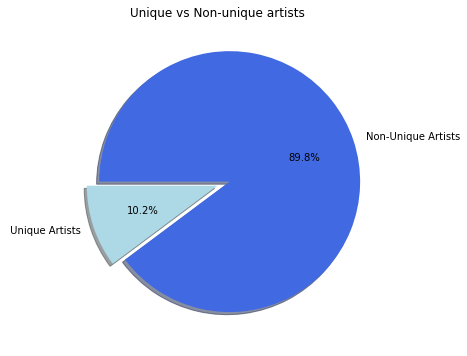

In [97]:
#Using a pie chart to show the comparison
unique_artist_list = np.array([unique_artists, non_unique_artists]) 
unique_artist_list_labels = [" Unique Artists", "Non-Unique Artists"] 

fig, ax = plt.subplots(figsize=(12,6))
colors = ['#add8e6', '#4169e1']
explode = [0,0.1]
ax.pie(unique_artist_list, labels= unique_artist_list_labels, autopct='%1.1f%%' ,startangle=180, shadow = True, colors = colors, explode = explode);
plt.title("Unique vs Non-unique artists")
plt.show()

We use **matplotlib** to make the pie chart. The results of the pie chart can be interpreted as:
- The unique artist percentage is around 10.2% (966 unique artists)
- The non-unique artist percentage is around 89.8% (8502 non-unique artists)

#### 3.1.2 The uniqueness of song
Here, we are trying to explore the uniqueness of the song and we will made a pie-chart to see the comparison between the unique songs vs the non-unique songs.

In [98]:
#See the comparison between Unique songs and non-unique songs
unique_songs = df["trackName"].nunique() # Count number of unique artist 
total_songs = df["trackName"].count() # Count total number of artist 
non_unique_songs = total_songs - unique_songs
unique_songs

2451

In [99]:
non_unique_songs

7017

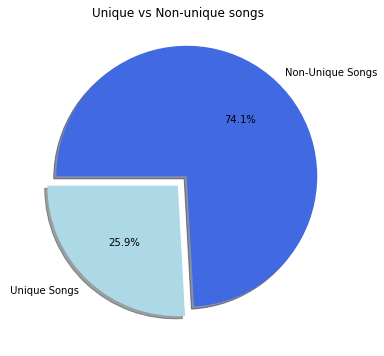

In [100]:
#Using a pie chart to show the comparison
unique_song_list = np.array([unique_songs, non_unique_songs]) 
unique_song_list_labels = [" Unique Songs", "Non-Unique Songs"] 

fig, ax = plt.subplots(figsize=(12,6))
colors = ['#add8e6', '#4169e1']
explode = [0,0.1]
ax.pie(unique_song_list, labels= unique_song_list_labels, autopct='%1.1f%%' ,startangle=180, shadow = True, colors = colors, explode = explode);
plt.title("Unique vs Non-unique songs")
plt.show()

We also use **matplotlib** to make the second pie chart. The results of the pie chart can be interpreted as:
- The unique song percentage is around 25.9% (2451 unique songs)
- The non-unique song percentage is around 74.1% (7017 non-unique songs)

### 3.2 Exploration of my top-10 artists

In this part, I am trying to see the top-10 artist grouped by `Listening Time in min` column and sorted by the largest amount of minutes to the lowest.

In [101]:
#Check to see my top 10 artist
top_10_artist_time_df = df.groupby(["artistName"])[["Listening Time in min","Count"]].sum().sort_values(by="Listening Time in min",ascending=False)
top_10_artist_time_df.head(10)

,Listening Time in min,Count
artistName,,
Drake,1582.61,610
Justin Bieber,1142.58,557
Chris Brown,537.77,237
Post Malone,396.52,171
ZAYN,390.06,176
Pamungkas,361.70,126
Nick Jonas,347.32,149
Lauv,337.88,167
Ari Lasso,329.49,98


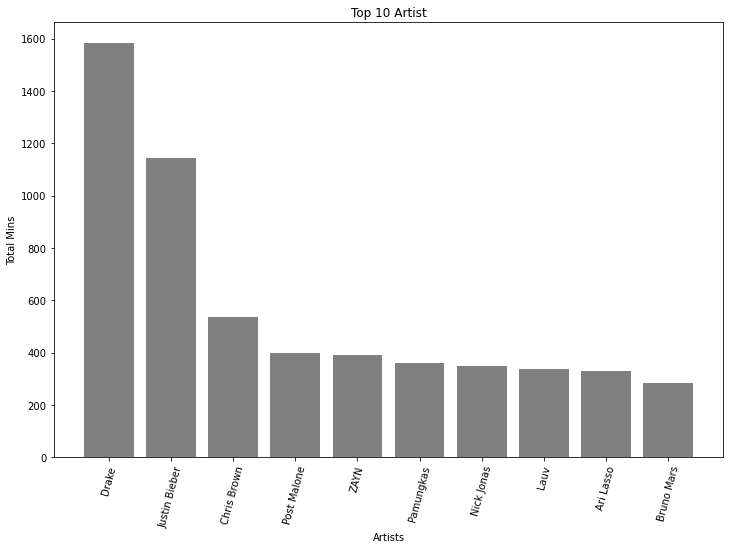

In [102]:
#Made a bargraph of my top 10 artists
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df["Listening Time in min"].head(10),color='grey')
ax.set(title= "Top 10 Artist",xlabel="Artists",ylabel= "Total Mins");
plt.xticks(rotation=75);

We used a bar-graph for our visualization to show the top-10 artist categorized by the total amount of listening time. From the graph, we can see that I listened the most to **Drake**, **Justin Bieber** in the second position, and **Chris Brown** in the third position. 

### 3.3 Exploration of my top-10 songs

In this part,  I am trying to see the top-10 songs grouped by `Listening Time in min` column and sorted by the largest amount of minutes to the lowest.

In [103]:
#Check my top 10 songs
top_10_songs_df = df.groupby(["trackName"])[["Listening Time in min","Count"]].sum().sort_values(by="Listening Time in min",ascending=False)
top_10_songs_df.head(10)

,Listening Time in min,Count
trackName,,
Go Crazy,259.60,128
Holy (feat. Chance The Rapper),206.14,78
To the Bone,199.49,60
No Guidance (feat. Drake),197.44,75
Laugh Now Cry Later (feat. Lil Durk),189.53,71
I Fall Apart,137.43,51
"Still Falling For You - From ""Bridget Jones's Baby""",135.79,40
Wants and Needs (feat. Lil Baby),118.92,46
Really Love (feat. Craig David & Digital Farm Animals),113.31,49


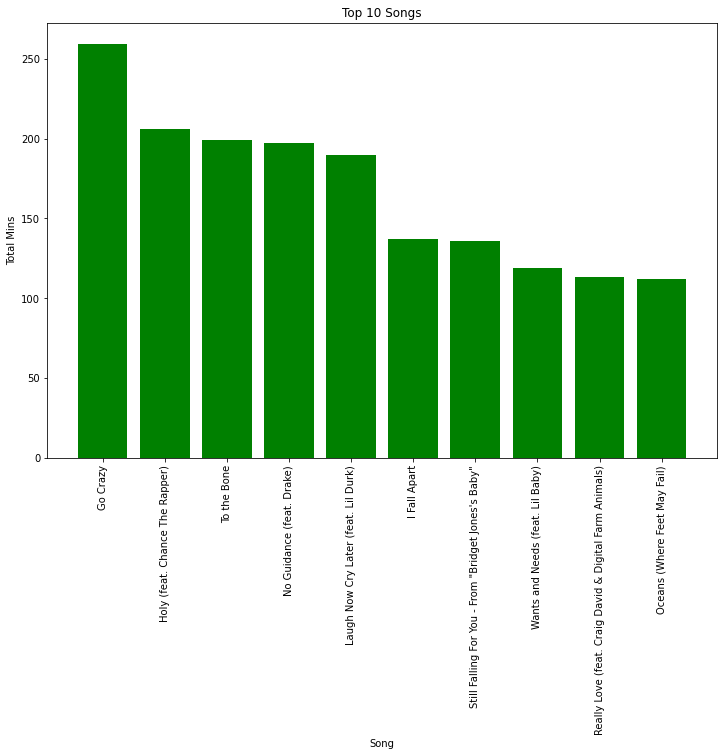

In [104]:
#Made a bargraph of my top 10 songs
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_songs_df.head(10).index,top_10_songs_df["Listening Time in min"].head(10),color='green')
ax.set(title= "Top 10 Songs",xlabel="Song",ylabel= "Total Mins");
plt.xticks(rotation=90);

Similar to the previous part, we used a bar-graph for our visualization to show the top-10 songs categorized by the total amount of listening time. From the graph, we can see that I listened the most to & **Go Crazy** by Chris Brown, **Holy (feat. Chance The Rapper)** by Justin Bieber in the second position, and **To The Bone ** by Pamungkas in the third position.

### 3.4 Exploration of Spotify's usage in a week

In this next part, I am trying to explore my usage in Spotify (using a percentage) over a span time of a week.

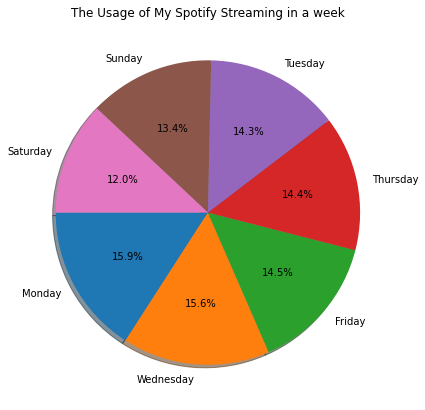

In [105]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.pie(df["Day-name"].value_counts(), labels = df["Day-name"].value_counts().index, autopct='%1.1f%%', startangle=180, shadow = True);
ax.set(title="The Usage of My Spotify Streaming in a week");

From the piechart, we can see that I spend the most amount of time in Spotify on Monday, which is around 15.9% and the least amount of time on Saturday, which is around 12.0%.

### 3.5 Exploration of Average Streaming Distribution in a day

In this part, I am trying to explore my average of spotify usage in a day. Our goal in this part is to see at what time I spend the most amount of time using Spotify.

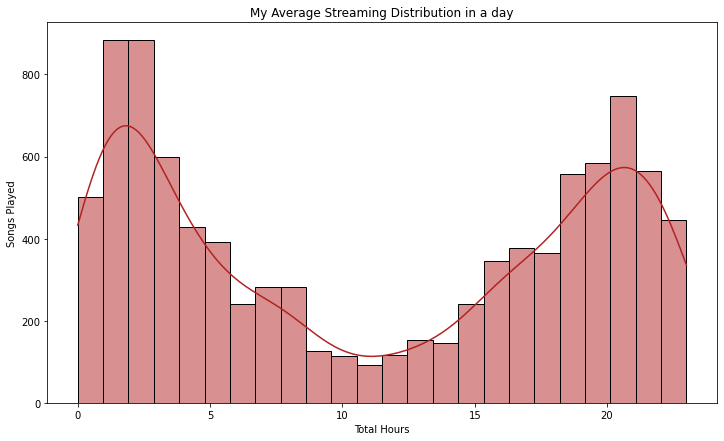

In [106]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set(title="My Average Streaming Distribution in a day",xlabel= "Total Hours", ylabel="Songs Played")
sns.histplot(df["Hours"], bins=24,kde=True, color="firebrick");

Using a histogram from `Seaborn` package, we managed to make a histogram graph of my average streaming distribution in a day. The graph can be interpreted as:
- The most time I used spotify is `1-3 am`.
- The least time I used spotify is `11-12 pm`.

### 3.6 Exploration of Average Spotify Usage over the years

In this next part, I am tring to explore the average amount of songs that I heard in a year. 

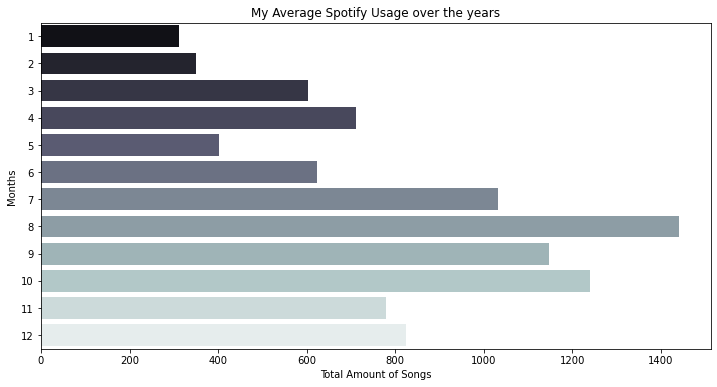

In [108]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(y=df["Month"], palette = 'bone')
ax.set(title="My Average Spotify Usage over the years", xlabel="Total Amount of Songs", ylabel="Months");

Using a countplot from **Seaborn** package, we can see that the most usage of my spotify streaming history is on the 8th month or August and the least usage is on 4th month or April.

### 3.7 Exploration the total amount of time I spent on Spotify

In [109]:
total_min = df["Listening Time in min"].sum() 
total_min

20345.489999999998

In [110]:
total_hours = total_min / 60
total_hours

339.09149999999994

In [111]:
total_days = total_hours / 24
total_days

14.128812499999997

Using a simple calculation above, we can see that I spent around 14 days or 339 hours or 20,345 minutes in total on Spotify, which is basically around two weeks in total. 

## 4.0 Conclusion

From different parts of this dataset, we acquired a lot of insights of my spotify usage over a span amount of time. The key insights of this data are:
- I have played songs from 966 unique artists and 8502 non-unique artists, which comprises of 10.2% and 89.8% respectively.
- I have played **2451 unique songs** and **7017 non-unique songs**, which comprises of 25.9% and 74.1% respectively.
- My top artist is **Drake** and my top song is **Go Crazy** by Chris Brown.
- I spend the most amount of time in Spotify on **Monday**.
- The most time I used spotify is **1-3 am** and the least time I used spotify is **11-12 pm**.
- I spend the most time in Spotify in August and the least time in May.
- I spend a total amount time of 14 days in total on Spotify =.